<a href="https://colab.research.google.com/github/dl0312/19_system_programming_cse4100/blob/master/Machine%20Learning/AND_OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title 기본 제목 텍스트
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivative_sigmoid(x):
    return x * (1 - x)

In [0]:
mode = 0
while mode is not 1 and mode is not 2:
    mode = int(input("Which bitwise operation do you want? 1. AND  2. OR\n"))

Which bitwise operation do you want? 1. AND  2. OR
1


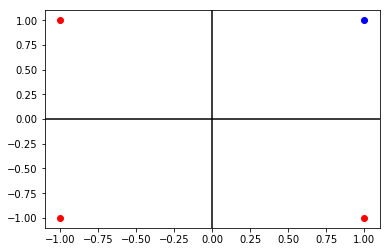

In [0]:
# input
x = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# output

# AND
if mode is 1: y = np.array([[1], [0], [0], [0]])
# OR
if mode is 2: y = np.array([[1], [1], [0], [1]])

# plot the training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
    if y[i][0] == 0:
        marker = 'ro'
    else:
        marker = 'bo'
    ax.plot(x[i][0], x[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [0]:
epoch = 5000 # number of training iterations
learning_rate = 0.1 # very big number

# dimension of each layer
d_in = x.shape[1] # number of features in the input dataset
d_out = 1 # output layer

# weight and bias initialization
wout = np.random.uniform(size=(d_in, 1))
bout = np.random.uniform(size=(1, d_out))

In [0]:
for i in range(epoch):
    # Forward pass
    y_pred = sigmoid(x.dot(wout) + bout)
    
    # Compute and print loss
    loss = np.square(y_pred - y) # 1/2 is not that affect to result because of performance
    if i % 500 == 0:
        print('Epoch', i, ':', loss.sum())
    
    # Backpropagation to compute gradients
    grad_y_pred = (y-y_pred) + derivative_sigmoid(y_pred)
    grad_wout = x.T.dot(grad_y_pred)
    grad_bout = np.sum(grad_y_pred, axis=0, keepdims=True) # make input node converge to 1
    
    # Update weights and biases
    wout += grad_wout * learning_rate
    bout += grad_bout * learning_rate

Epoch 0 : 0.74029173585023
Epoch 500 : 0.027516509513768904
Epoch 1000 : 0.013507247277447981
Epoch 1500 : 0.008903442130934918
Epoch 2000 : 0.006627281688102563
Epoch 2500 : 0.005272872876378537
Epoch 3000 : 0.004375670199690082
Epoch 3500 : 0.0037380569038120023
Epoch 4000 : 0.0032618341428280184
Epoch 4500 : 0.002892730516143799


In [0]:
print('Input')
print(x)
print('Label')
print(y)
print('Output')
print(y_pred)
print('Weight')
print(wout)
print('Bias')
print(bout)

Input
[[ 1  1]
 [ 1 -1]
 [-1 -1]
 [-1  1]]
Label
[[1]
 [0]
 [0]
 [0]]
Output
[[9.99228702e-01]
 [3.60434615e-02]
 [1.07918297e-06]
 [3.60434615e-02]]
Weight
[[5.22664645]
 [5.22664645]]
Bias
[[-3.28642636]]
